<h1>DENGUE CASES TREND FROM 2016 - 2020</h1>
<h2>Analyst: Meloujean Ligon</h2>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [34]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [35]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [36]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

dengue.dtypes

In [37]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [38]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [39]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h1>BAR PLOT</h1>

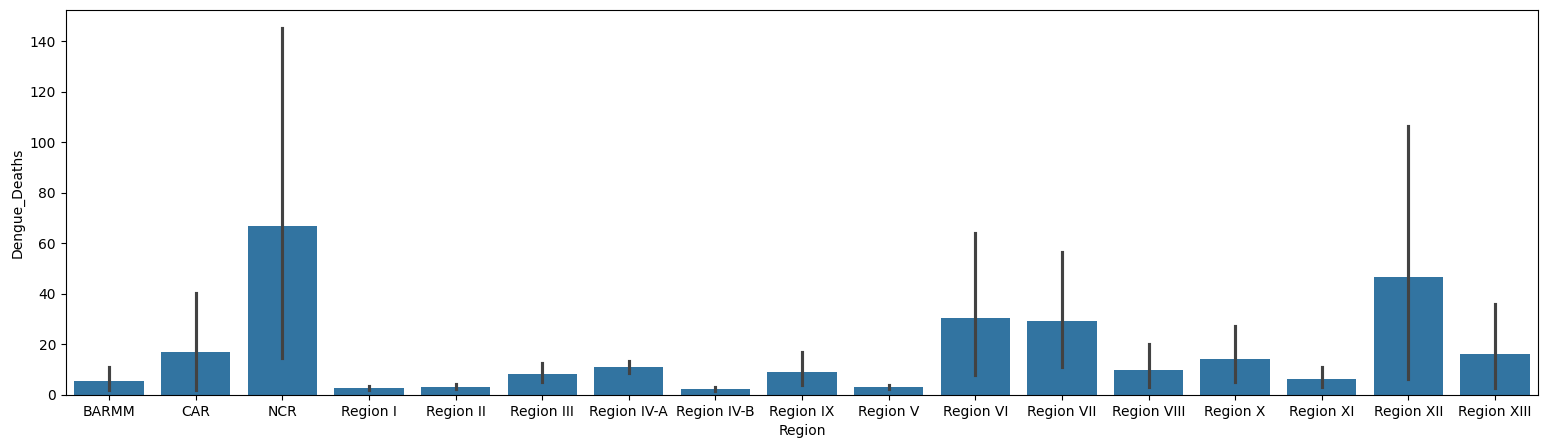

In [40]:
sns.barplot(data=dengue, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 5) 
plt.show()

<h1>LINE PLOT</h1>

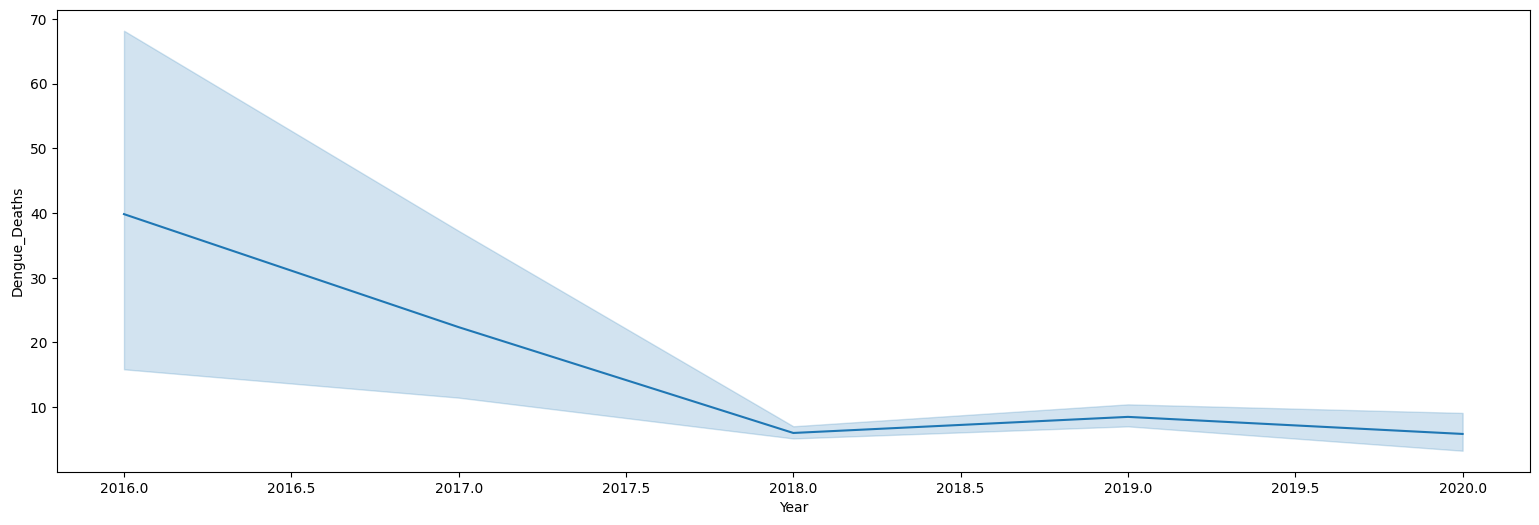

In [41]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>SCATTER PLOT</h1>

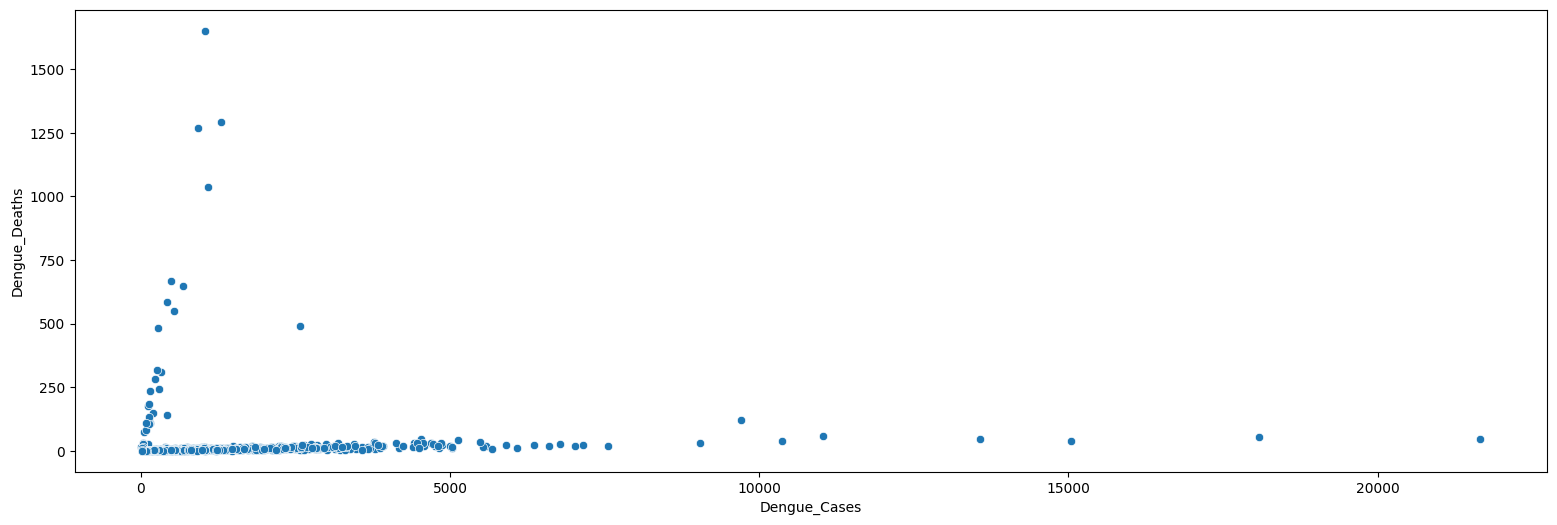

In [42]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>BOX PLOT</h1>

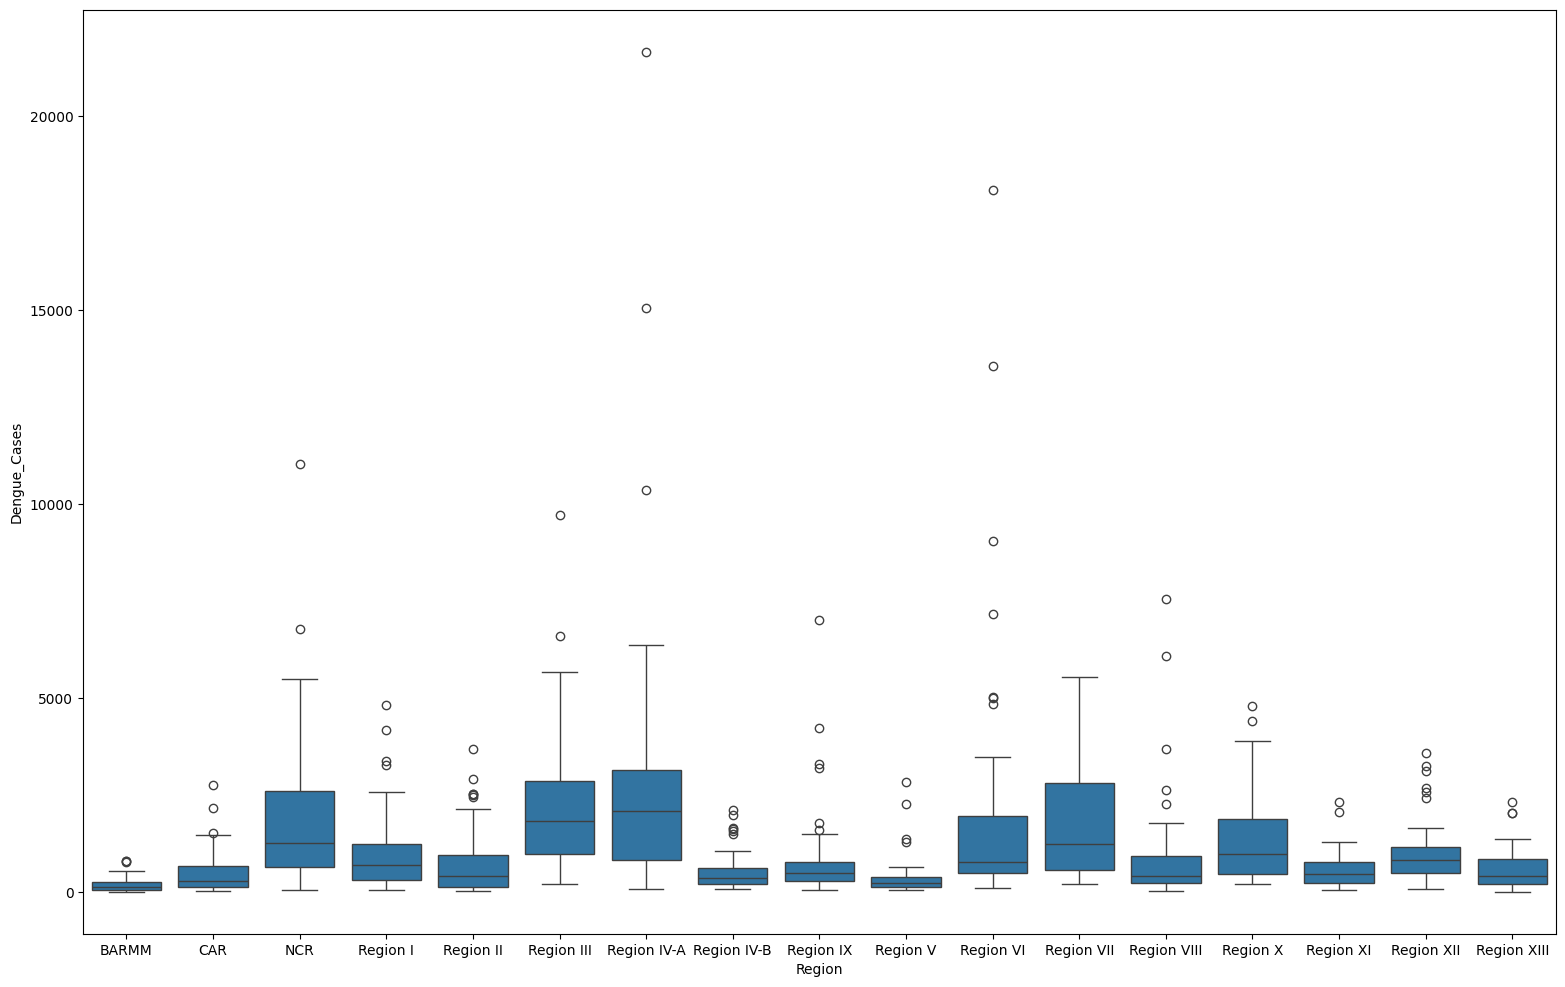

In [43]:
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

In [44]:
dengue_V2 = dengue[dengue["Year"] != '2019-01-01']

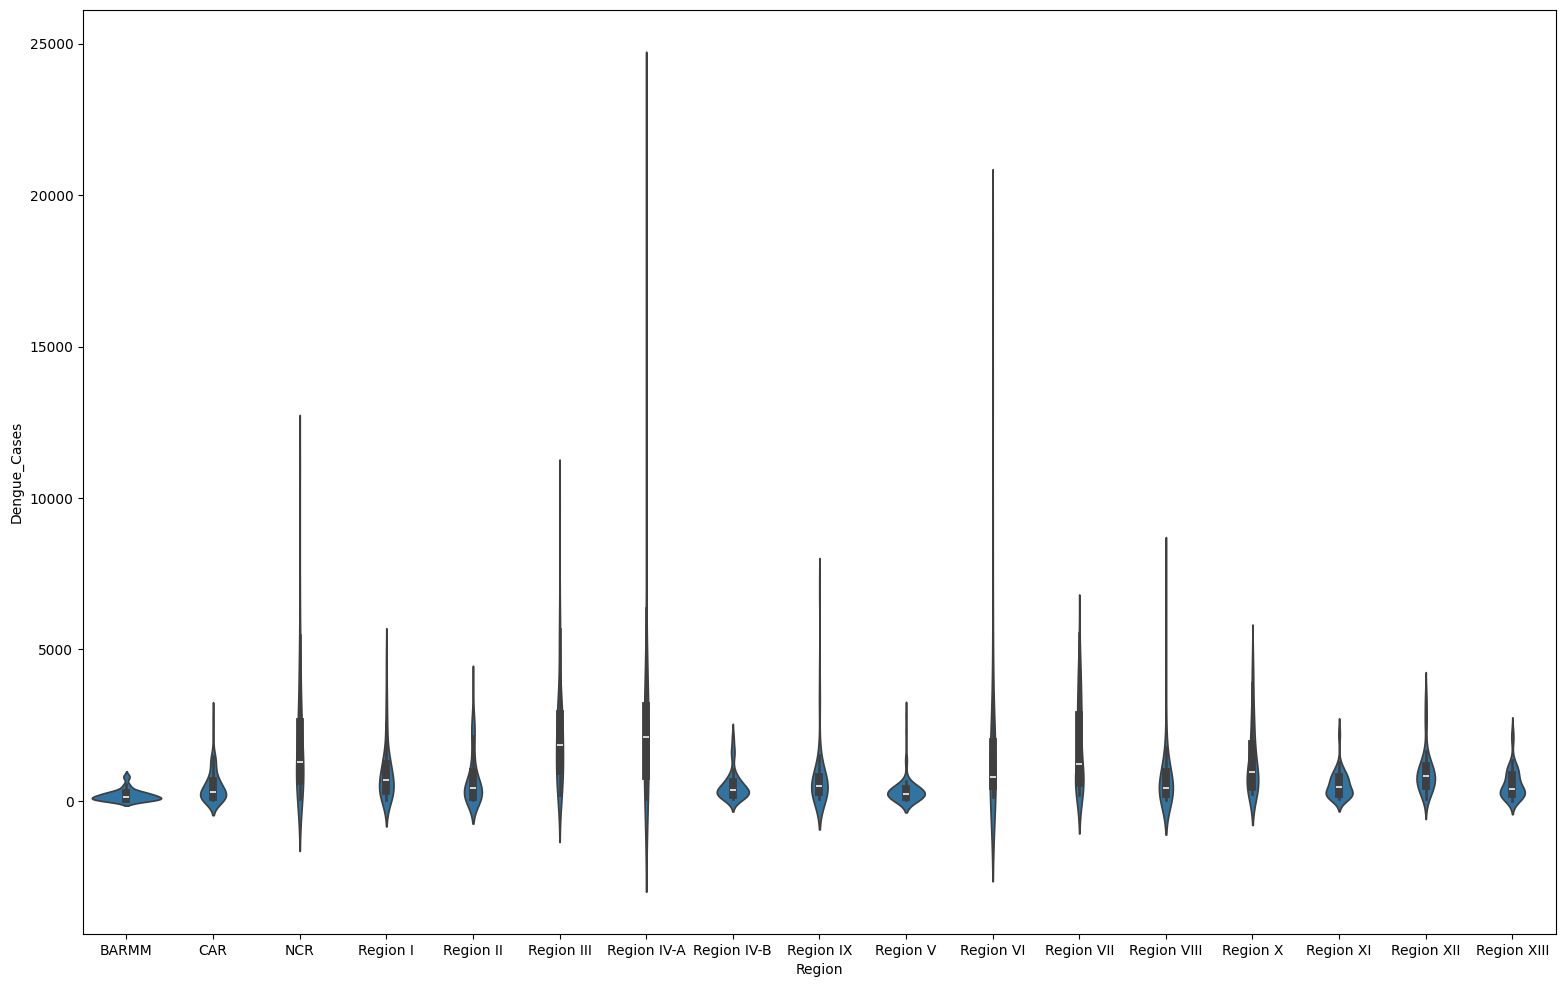

In [45]:
sns.violinplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

<h1>Insight 1</h1>
<h2>The number of dengue cases has been fluctuated over the years. In 2016, there were 209,544 cases. This dropped to 154,155 in 2017. The number of cases increased in 2018 to 250,783, and then rose sharply in 2019 to 441,902. However, in 2020, the number of cases dropped significantly to just 91,041.</h2>

In [46]:
yearly = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

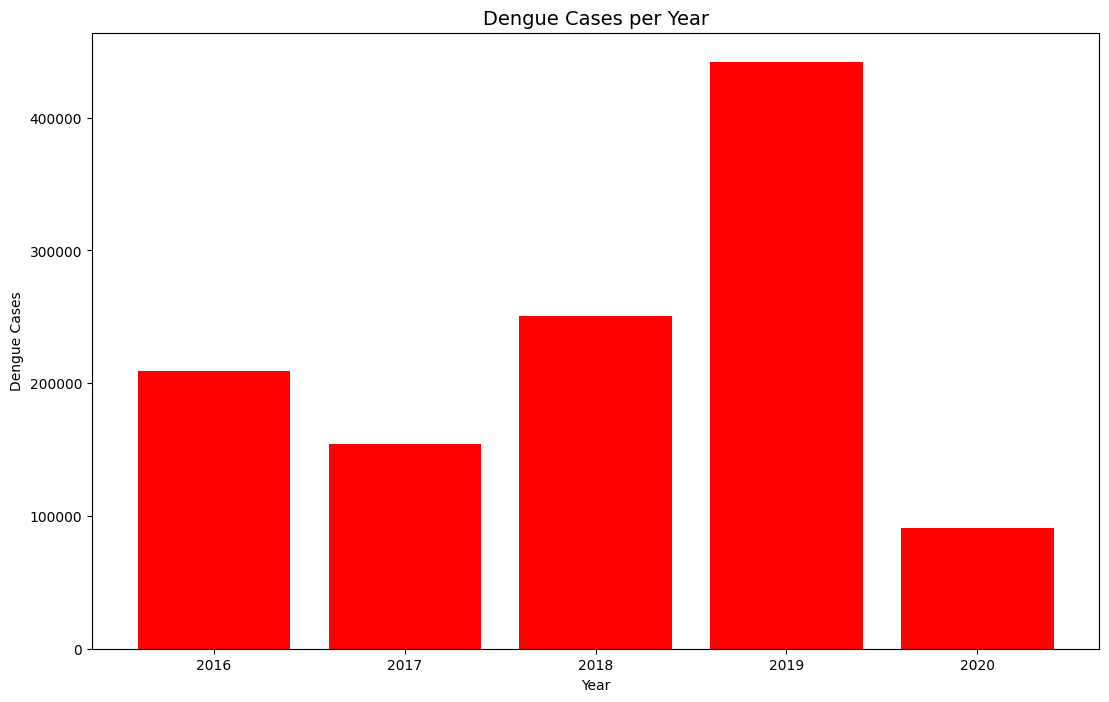

In [47]:
yearly = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(13,8))
plt.bar(yearly.index, yearly.values, color='red')
plt.title("Dengue Cases per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.show()

<h1>Insight 2</h1>
<h2>Region IV-A has recorded the highest number of dengue cases with 163,029, followed by Region III with 131,064 and Region VI with 117,523 cases. These regions have the most significant share of the total dengue cases, reflecting both higher population.</h2>

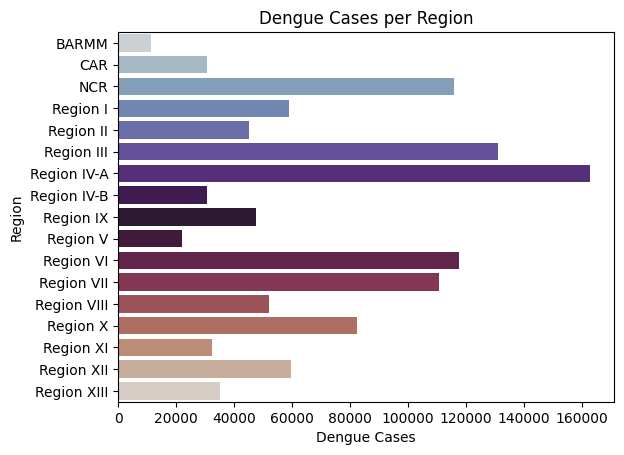

<Figure size 1300x800 with 0 Axes>

In [48]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values()
sns.barplot(x=region_cases.values, y=region_cases.index, palette="twilight")
plt.title("Dengue Cases per Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Region")
plt.figure(figsize=(13, 8))
plt.show()

<h1>Insight 3</h1>
<h2>Dengue cases are highest in August (2,206) and September (2,093), followed by July (1,626) and October (1,384)</h2>

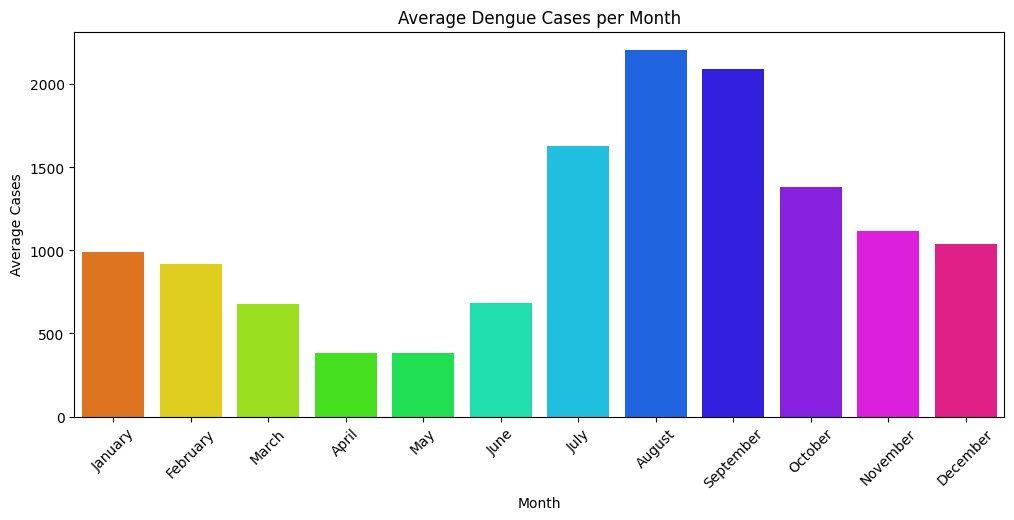

In [49]:
monthly_cases = dengue.groupby("Month")["Dengue_Cases"].mean()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_cases = monthly_cases.reindex(month_order)
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_cases.index, y=monthly_cases.values, palette="hsv")
plt.title("Average Dengue Cases per Month")
plt.ylabel("Average Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 4</h1>
<h2>Some regions experience a steady rise in dengue cases over time, whereas others see fluctuating numbers.</h2>

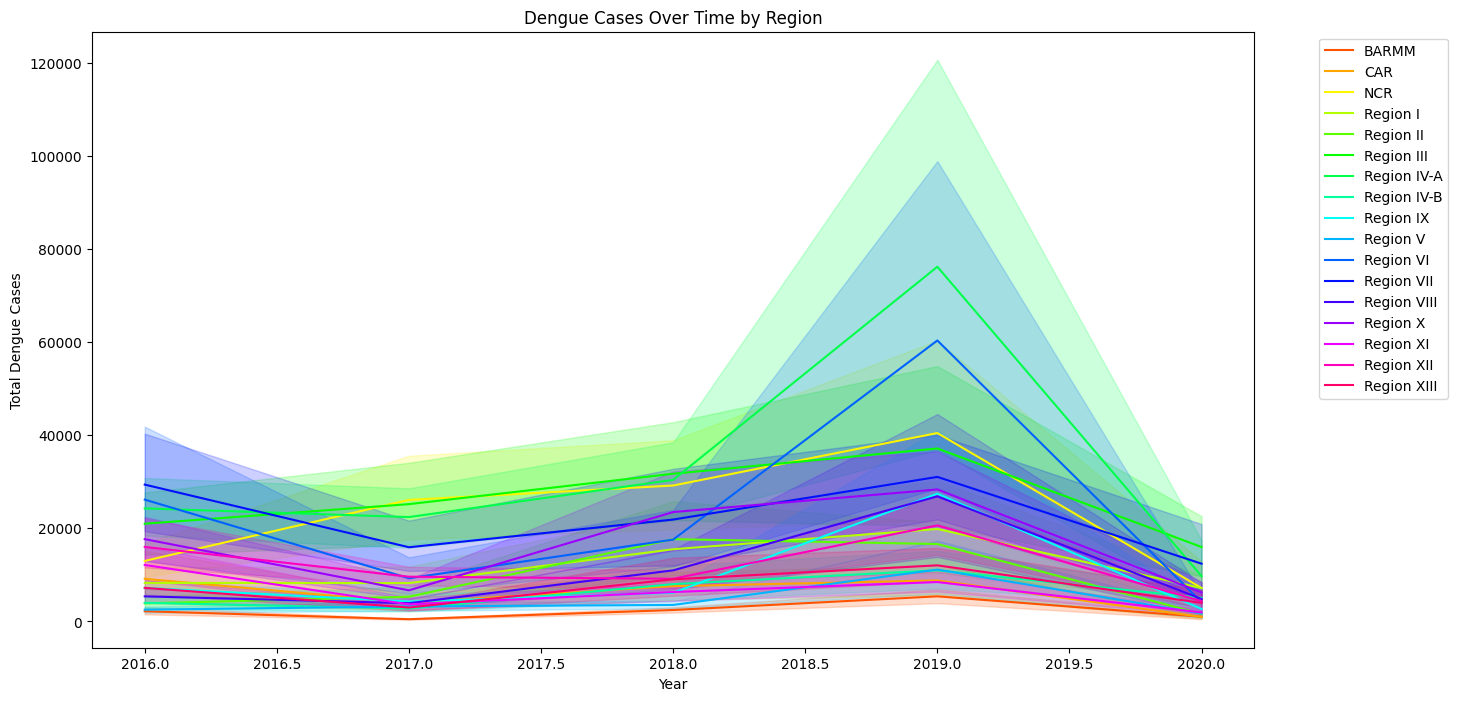

In [50]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=dengue, x = "Year", y = "Dengue_Cases", hue="Region", estimator="sum", markers=True, palette="hsv")
plt.title("Dengue Cases Over Time by Region")
plt.ylabel("Total Dengue Cases")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h1>Insight 5</h1>
<h2>Dengue cases vary a lot each month and from year to year, showing that outbreaks happen unevenly.</h2>

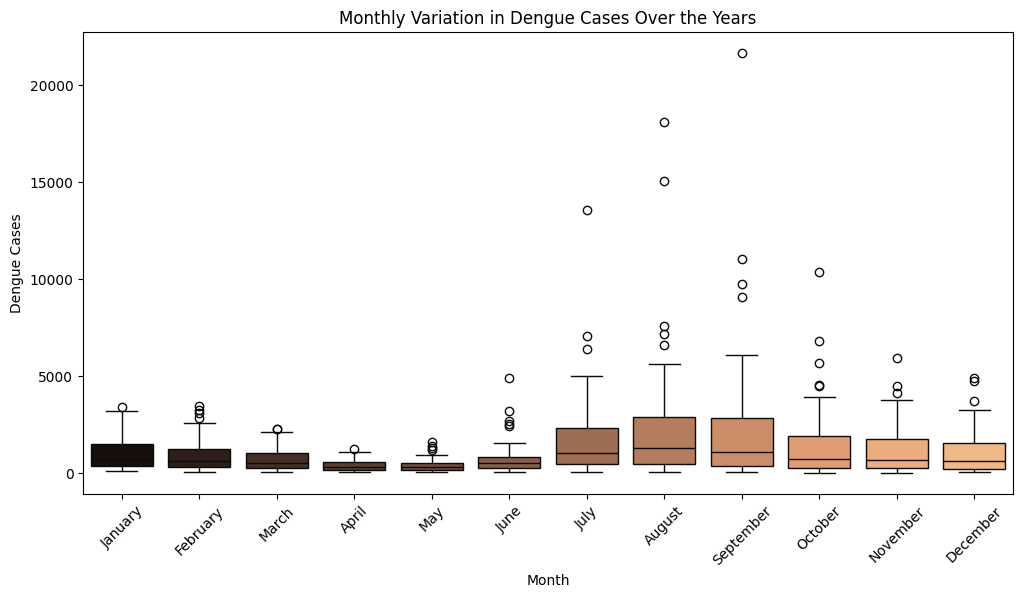

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dengue, x="Month", y="Dengue_Cases", palette="copper", order=month_order)
plt.title("Monthly Variation in Dengue Cases Over the Years")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 6</h1>
<h2>The highest number of dengue deaths occurred in October 2016, with a total of 3,954 deaths.</h2>

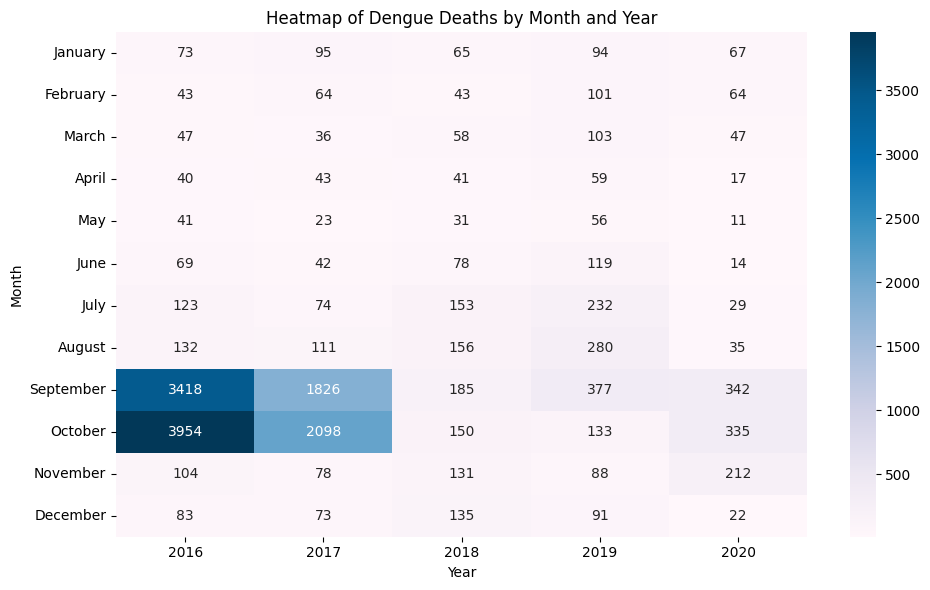

In [52]:
pivot_deaths = dengue.pivot_table(values='Dengue_Deaths', index='Month', columns='Year', aggfunc='sum')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_deaths = pivot_deaths.reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_deaths, annot=True, fmt=".0f", cmap='PuBu')
plt.title('Heatmap of Dengue Deaths by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

<h1>Insight 7</h1>
<h2>Some regions have a higher number of dengue deaths compared to the number of cases. NCR reported 4,008 deaths, despite not having the highest number of cases. Similarly, Region XII recorded 2,796 deaths</h2>

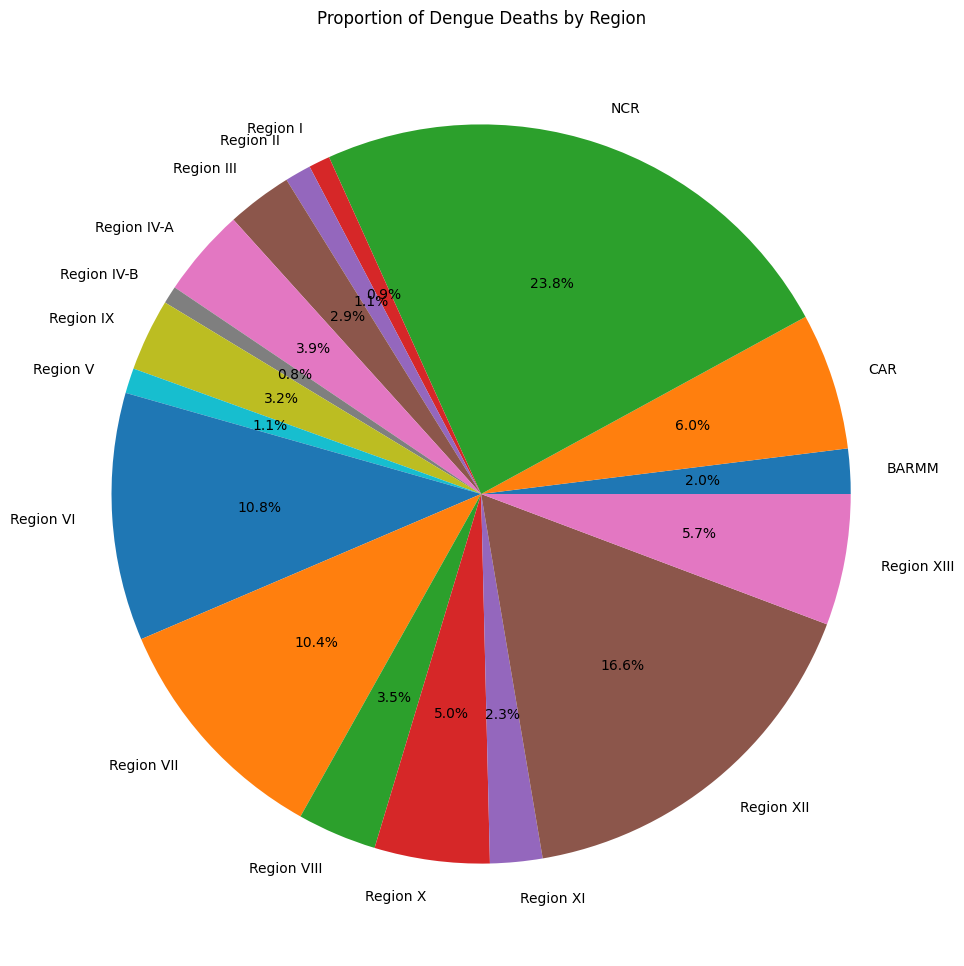

In [53]:
deaths_by_region = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()
deaths_by_region
plt.figure(figsize=(12,12))
plt.pie(deaths_by_region['Dengue_Deaths'], labels=deaths_by_region['Region'], autopct='%1.1f%%')

plt.title("Proportion of Dengue Deaths by Region")
plt.show()

<h1>Insight 8</h1>
<h2>In 2016, dengue deaths were at their highest, even though there were fewer reported cases. Meanwhile, 2019 saw the most dengue cases, but the number of deaths was not as high in comparison.</h2>

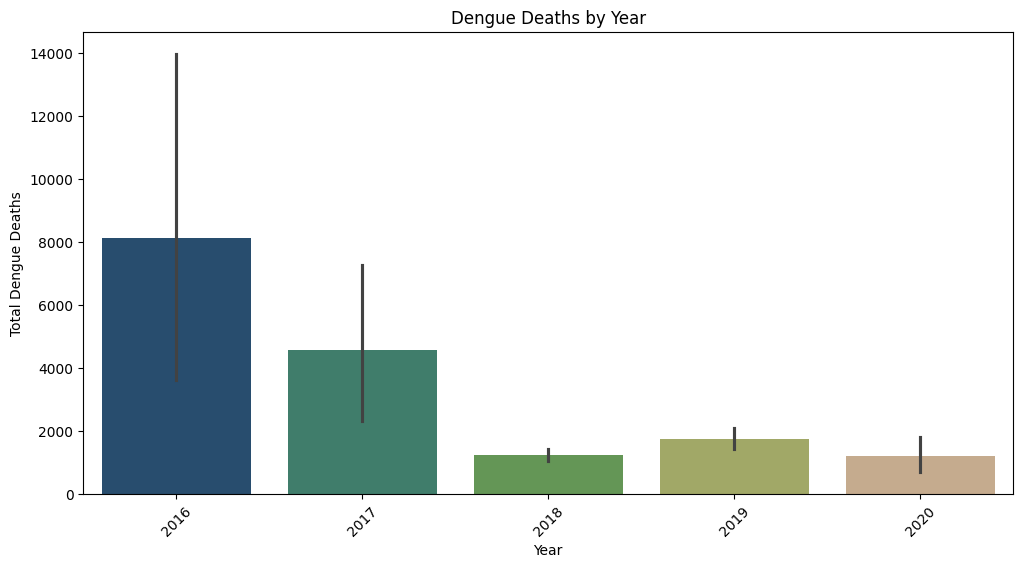

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue, x='Year', y='Dengue_Deaths', estimator=np.sum, palette='gist_earth')
plt.title('Dengue Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h1>Insight 9</h1>
<h2>There is a positive correlation  between the number of dengue cases and deaths, but times with many cases don't always result in more deaths.</h2>

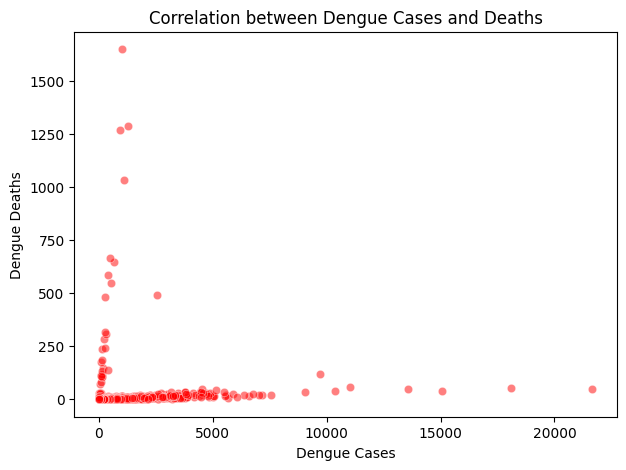

In [55]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5, color = 'red')
plt.title("Correlation between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight 10</h1>
<h2>There is a positive correlation  between the number of dengue cases and deaths, but times with many cases don't always result in more deaths.</h2>

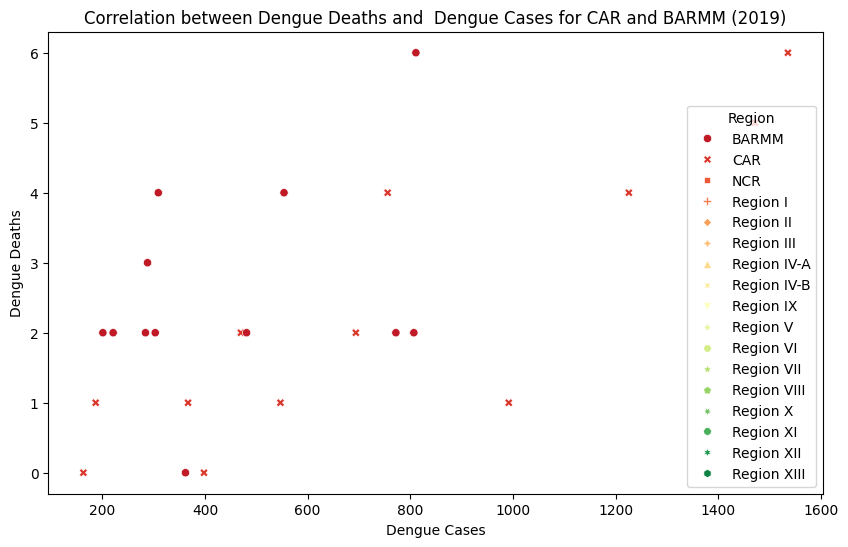

In [56]:
car_barmm_2019 = dengue[(dengue['Year'] == 2019) & dengue['Region'].isin(['CAR', 'BARMM'])]
car_barmm_2019
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_barmm_2019, x='Dengue_Cases', y='Dengue_Deaths', hue='Region', palette='RdYlGn', style='Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Correlation between Dengue Deaths and  Dengue Cases for CAR and BARMM (2019)')
plt.show()

<h1>Insight 11</h1>
<h2>Although certain regions may report a higher number of cases, other areas could experience a significantly greater number of deaths, which may suggest disparities in healthcare quality or differences in response efforts.</h2>

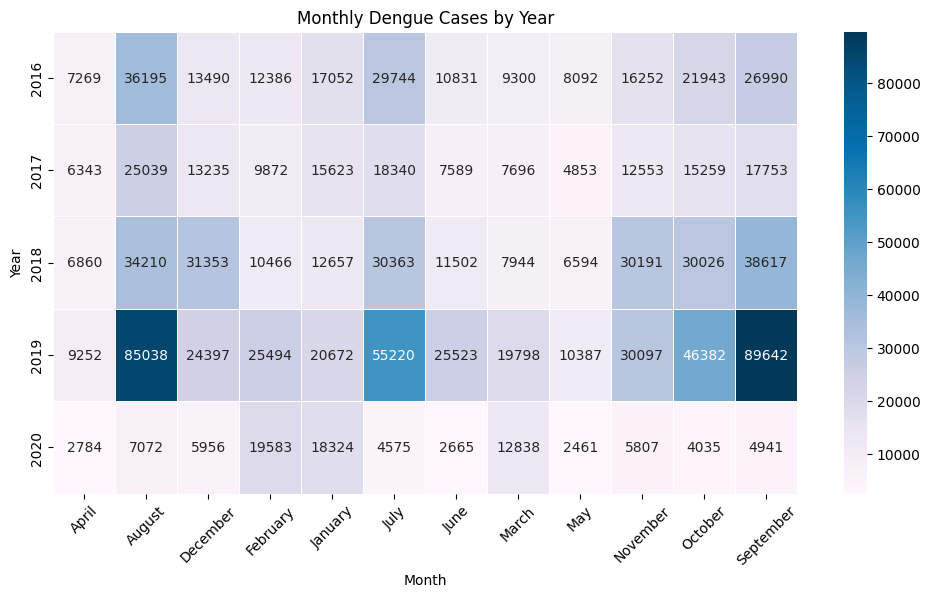

In [57]:
yr_mon = dengue.groupby(["Year", "Month"])["Dengue_Cases"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(yr_mon, cmap="PuBu", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Monthly Dengue Cases by Year")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 12</h1>
<h2>Almost half of all dengue-related deaths in the dataset occurred in 2016, making it the deadliest year by far. This significant concentration of fatalities underscores the severity of the outbreak during that period and suggests that 2016 may have experienced unusually high transmission rates or other factors contributing to the increased mortality.</h2>

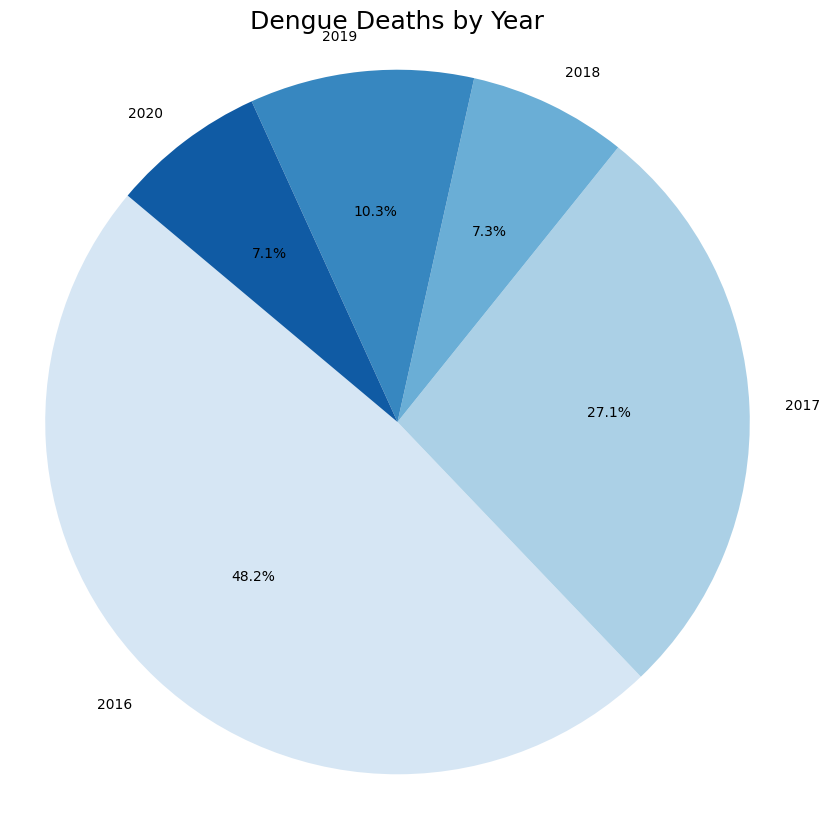

In [65]:

deaths_by_year = dengue.groupby("Year")["Dengue_Deaths"].sum()

plt.figure(figsize=(10, 10))
plt.pie(deaths_by_year, labels=deaths_by_year.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(deaths_by_year)))
plt.title("Dengue Deaths by Year", fontsize=18)
plt.axis("equal") 
plt.show()

<h1>Insight 13</h1>
<h2>The rainy season, typically from June to September, sees the highest dengue cases, with July, August, and September being the peak months. In 2019, August and September recorded over 85,000 cases, as increased rainfall created ideal mosquito breeding conditions. These months highlight the importance of heightened prevention efforts.</h2>

<h1>Insight 14</h1>
<h2>Dengue cases in 2020 significantly dropped, with only 4,575 cases reported in July, compared to 29,744 in 2016. This decline is attributed to COVID-19 restrictions that limited human interaction and mosquito transmission, along with potential underreporting as the focus shifted to the pandemic.</h2>

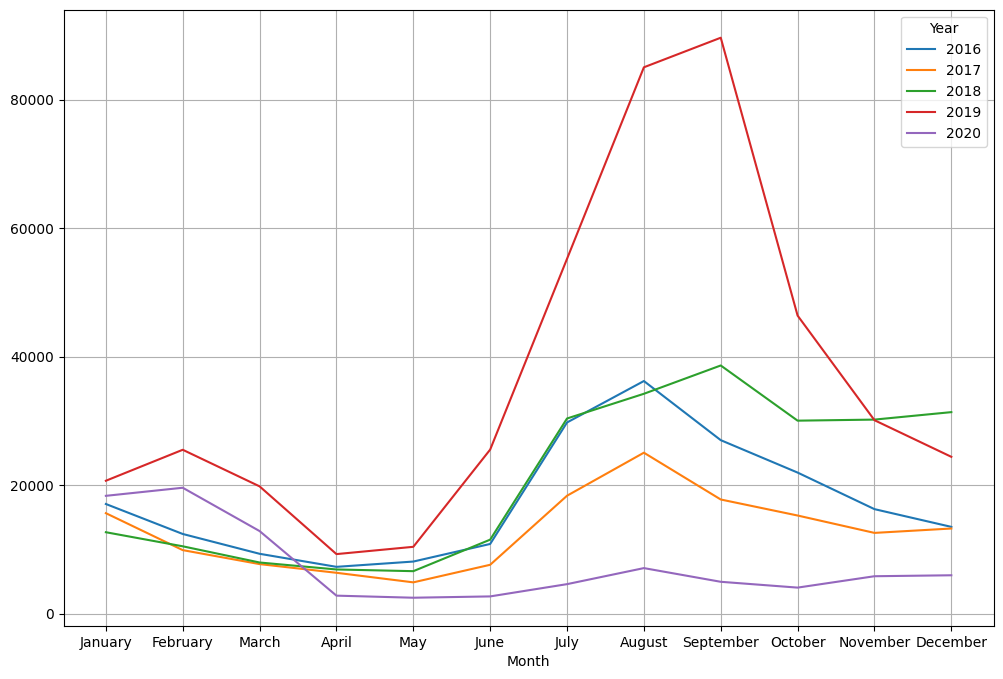

In [68]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()



<h1>Insight 15</h1>
<h2>Regions with higher dengue case numbers generally experience more deaths, though there is some variation between areas.</h2>


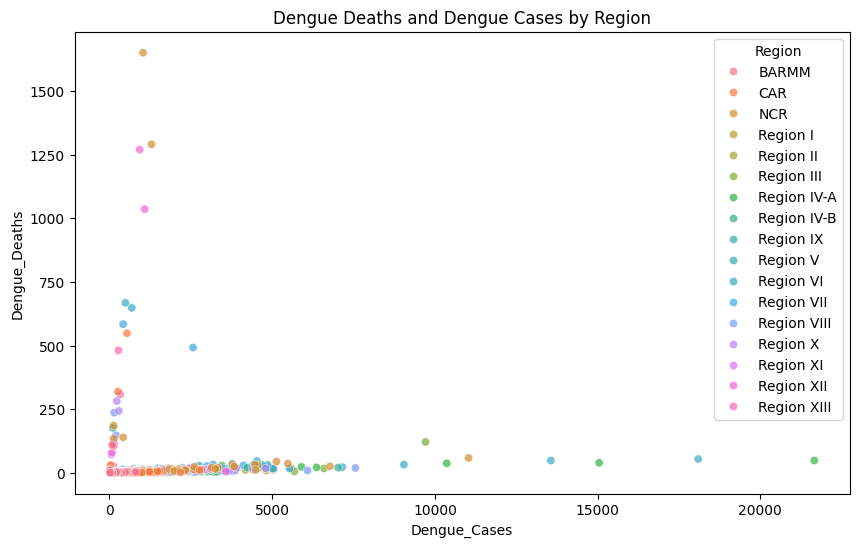

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", hue="Region", alpha=0.7)
plt.title("Dengue Deaths and Dengue Cases by Region")
plt.show()

<h1>Insight 16</h1>
<h2>Small to moderate dengue outbreaks are more common, as most case counts fall within the lower range. However, the histogram’s long tail indicates that severe outbreaks do occur occasionally, leading to significant spikes in cases.</h2>


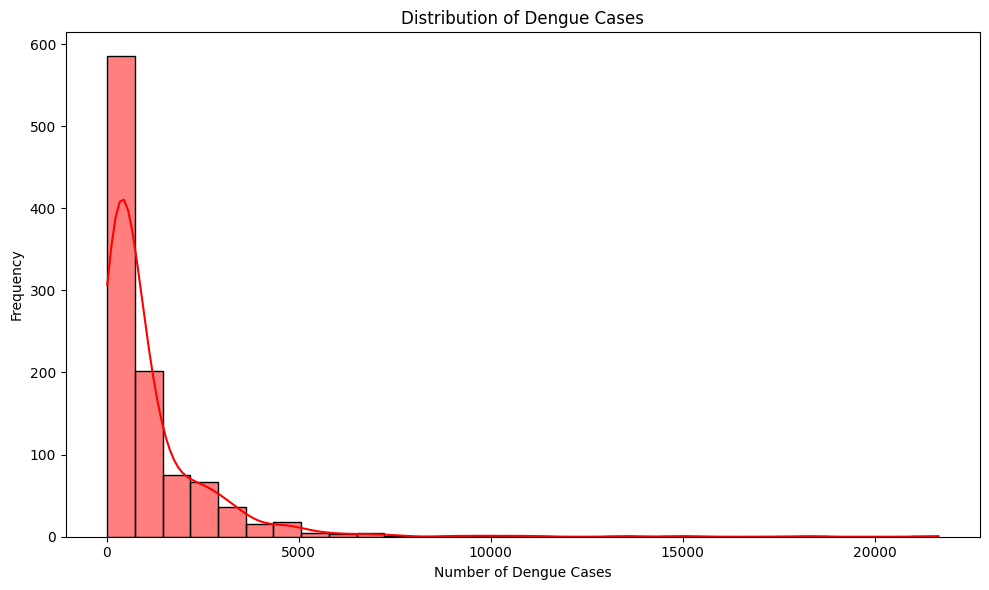

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(dengue["Dengue_Cases"], kde=True, bins=30, color='red')
plt.title("Distribution of Dengue Cases")
plt.xlabel("Number of Dengue Cases")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<h1>Insight 17</h1>
<h2>Dengue-related deaths are primarily concentrated during the rainy season months, when the conditions are most favorable for mosquito breeding. </h2>


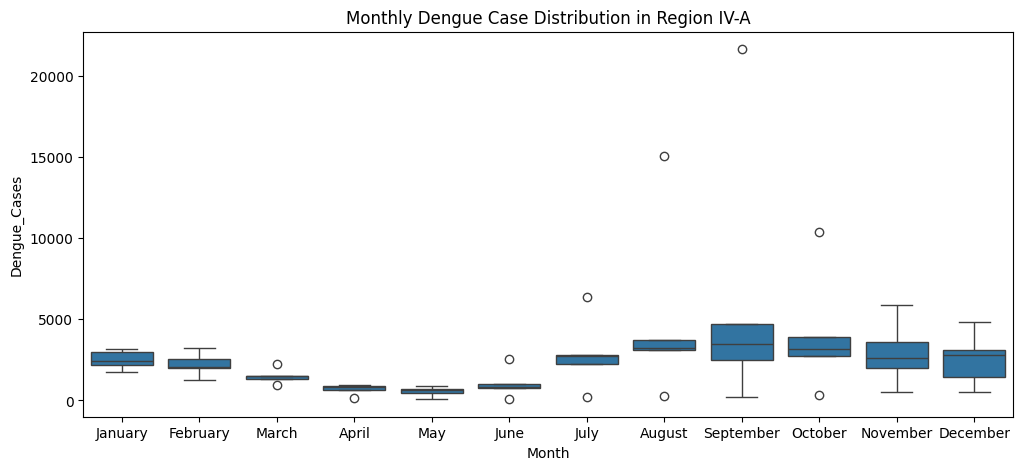

In [77]:
top_region = dengue.groupby("Region").sum(numeric_only=True).sort_values(by="Dengue_Cases", ascending=False).index[0]
plt.figure(figsize=(12,5))
sns.boxplot(data=dengue[dengue["Region"] == top_region], x="Month", y="Dengue_Cases")
plt.title(f"Monthly Dengue Case Distribution in {top_region}")
plt.show()

<h1>Insight 18</h1>
<h2>Region IV-A experienced a surge in dengue activity during the mid-year months, with a particularly notable increase around 2019.</h2>


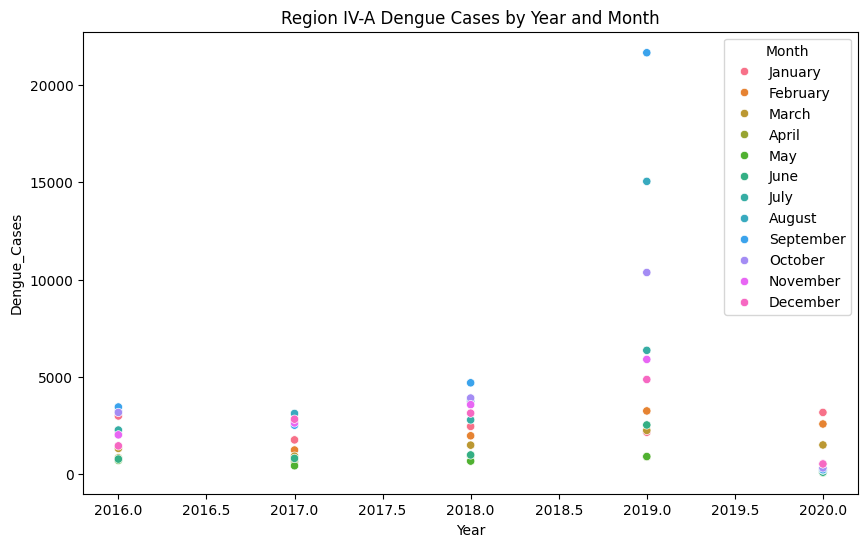

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dengue[dengue['Region'] == "Region IV-A"], x="Year", y="Dengue_Cases", hue="Month")
plt.title("Region IV-A Dengue Cases by Year and Month")
plt.show()

<h1>Insight 19</h1>
<h2>Luzon consistently reports higher and more fluctuating dengue case numbers over the years, in contrast to the relatively stable and lower numbers observed in the Visayas and Mindanao regions.</h2>


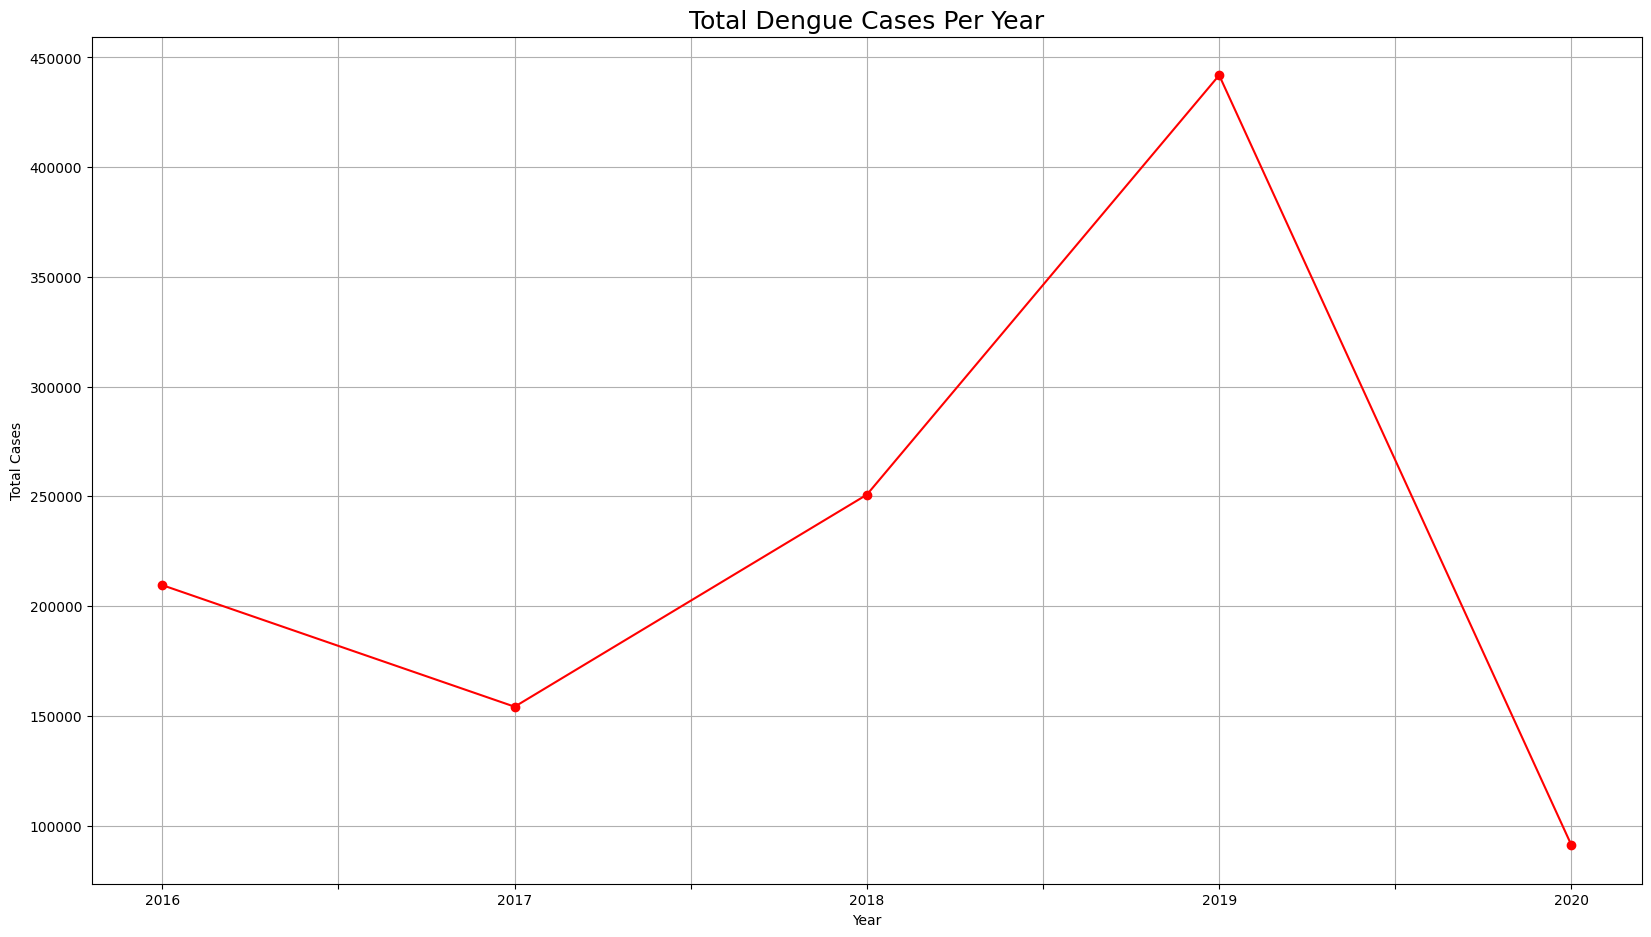

In [85]:
plt.gcf().set_size_inches(20,11)
dengue.groupby("Year")["Dengue_Cases"].sum().plot(marker="o", linestyle='-', color = 'Red')
plt.title("Total Dengue Cases Per Year", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()

<h1>Insight 20</h1>
<h2>The months from July to September typically show the broadest variation in dengue cases, indicating that while these months generally experience high case numbers, the intensity can vary significantly from year to year. This seasonal spike likely coincides with environmental factors, such as monsoon rains, which create favorable conditions for mosquito breeding and increase the potential for outbreaks.</h2>


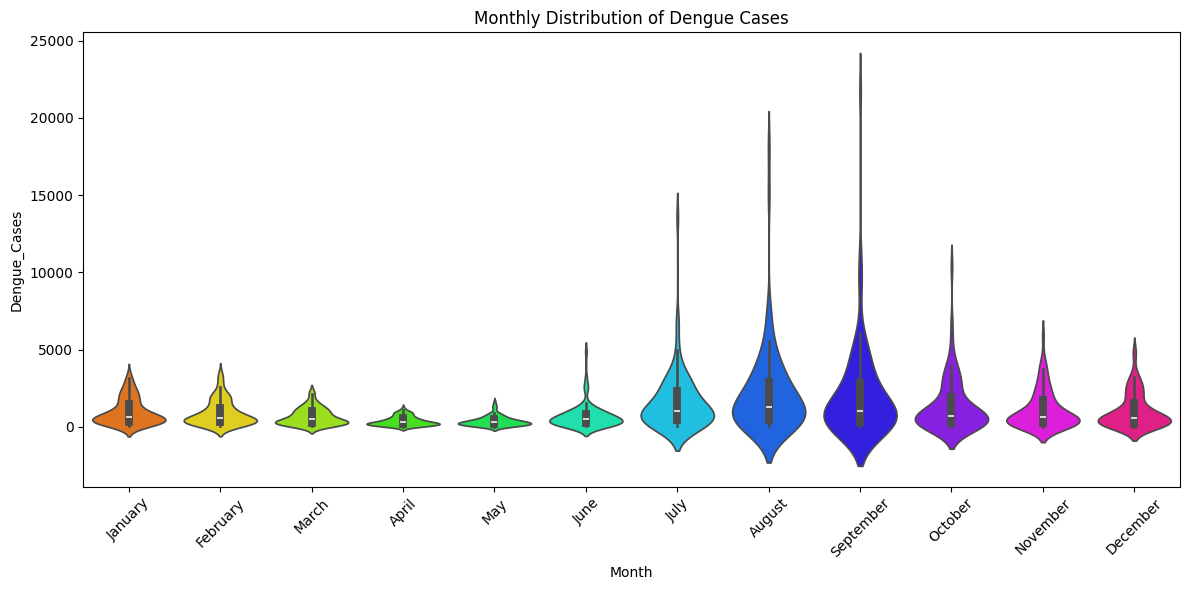

In [88]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=dengue, x="Month", y="Dengue_Cases", palette="hsv")
plt.title("Monthly Distribution of Dengue Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()